# Influencers in Social Networks

by [Jesus Solano](http://www.jesussolano.com/) -- [Jesus Solano](http://www.jesussolano.com/) -- [Jesus Solano](http://www.jesussolano.com/) -- [Jesus Solano](http://www.jesussolano.com/)


version 1.0, June 13 2018

In [14]:
import pandas as pd
data = pd.read_csv("https://github.com/jesugome/InfluencersInSocialNetworks/raw/master/datasets/train.csv",sep=",")
data.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


In [18]:
# Split the original data into train and test. 

from sklearn import model_selection 

dataSize = data.shape[0]
print("El archivo contiene: ",dataSize)

percentage = 0.30 

xTrain,xTest,yTrain,yTest = model_selection.train_test_split(data.iloc[:,1:],data.iloc[:,0],test_size=percentage,random_state=22)


El archivo contiene:  5500


In [20]:
# Import the neccesary libraries and set a seed. 
import numpy as np


np.random.seed(22)

In [26]:
# Random Forest Classifier. 

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs=2,n_estimators=100, random_state=0)

rfc.fit(xTrain, yTrain)

predictions = rfc.predict(xTest) 

In [35]:
# Calculate testing accuracy

from sklearn import metrics 

print("Accuracy = ",metrics.accuracy_score(yTest, predictions))

Accuracy =  0.7618181818181818


In [27]:
# Confusion matrix.
pd.crosstab(yTest, predictions)

col_0,0,1
Choice,,
0,608,211
1,182,649


In [30]:
# Calculating the AUC score. 

metrics.roc_curve(yTest, predictions)
metrics.roc_auc_score(yTest, predictions)

0.7616777526524818

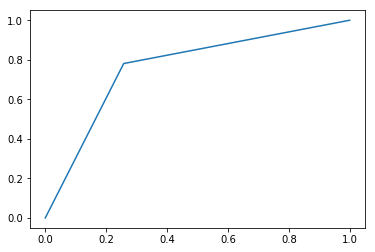

In [34]:
# Plot the ROC curve.
%matplotlib inline
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(yTest, predictions)
plt.plot(fpr,tpr)

In [8]:
# Validation data to upload results to kaggle.

validation = pd.read_csv("./datasets/test.csv",sep=",")
validation.head()

,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,614689,400,5729,199.618296,67.812469,9.366192,0.359534,4.094488,669,39.193741,...,563,20057,967.720642,579.431128,4.473798,0.805680,6.241806,4027,57.643839,3201.293706
1,739581,10723,1279,102.026750,96.771319,1.537322,1.054358,3.467754,432,11.191686,...,12949,1311,38.260522,10.697567,12.845793,1.584284,12.106662,144,209.717241,21496.565517
2,3638,3341,85,2.793577,1.402703,2.594089,0.598150,3.802143,11,9.416667,...,320,3673,1207.190077,599.721600,0.842022,0.593199,7.044735,3918,7.859818,637.983300
3,613,1259,31,1.326041,0.356943,6.249678,2.323064,7.488116,4,5.000000,...,3599,1072,10.300222,3.828561,1.624092,0.100503,1.614287,43,113.840909,2537.772727
4,1352348,331,15647,19129.848662,14552.733991,2.065418,0.580955,16.281502,52580,3.092448,...,147521,15043,9902.070379,5012.055876,10.438460,0.100503,193.072418,28564,10.964144,1035.955493
